In [1]:
import os

In [2]:
def count_subfolders(directory,depth_limit):
    """ Counts subfolders within the first two layers of the given directory """
    count = 0
    for root, dirs, files in os.walk(directory):
        # Calculate depth by comparing the root and the directory path
        depth = root[len(directory):].count(os.sep)
        if depth < depth_limit:  # Only count if the depth is less than 2
            count += len(dirs)
    return count

# Use a raw string for the directory path
directory_path = r"C:\Users\acer\Desktop\Project\Data"
depth = 2
total_subfolders = count_subfolders(directory_path,depth)
print(f"Total subfolders within two layers: {total_subfolders}")


Total subfolders within two layers: 0


In [ ]:
import nrrd

# Reading an NRRD file
data, header = nrrd.read(r"C:\Users\acer\Desktop\Project\Data\57-2014\Segmentation\474881R.nrrd")

# Accessing data and header information
print(data.shape)
print(header)

# Writing to an NRRD file
nrrd.write('new_file.nrrd', data, header)

In [ ]:
# Reading an NRRD file
data, header = nrrd.read(r"C:\Users\acer\Desktop\Project\Data\57-2014\Segmentation\Segmentation.seg.nrrd")

# Accessing data and header information
print(data.shape)
print(header)

# Writing to an NRRD file
nrrd.write('new_file.nrrd', data, header)

In [ ]:
import nrrd
import matplotlib.pyplot as plt

In [ ]:
def display_nrrd_slices(file_paths, slice_index, axis=0):
    """
    Display the same specific slice from multiple 3D NRRD images side by side.

    Parameters:
    - file_paths: list of str, paths to the NRRD files.
    - slice_index: int, index of the slice to display.
    - axis: int, dimension along which to slice the volumes (0, 1, or 2).
            0 - Axial (default), 1 - Coronal, 2 - Sagittal.
    """
    plt.figure(figsize=(10, 5))
    
    # Loop through each file
    for i, path in enumerate(file_paths):
        # Read the NRRD file (data and header)
        data, header = nrrd.read(path)

        # Select the slice based on the specified axis
        if axis == 0:
            slice_data = data[slice_index, :, :]
        elif axis == 1:
            slice_data = data[:, slice_index, :]
        elif axis == 2:
            slice_data = data[:, :, slice_index]
        else:
            raise ValueError("Invalid axis. Axis must be 0, 1, or 2.")
        
        # Plotting the slice using matplotlib
        ax = plt.subplot(1, len(file_paths), i + 1)
        ax.imshow(slice_data, cmap='gray')  # Use grayscale color map for better visualization
        ax.title.set_text(f'File {i+1}: Slice {slice_index} along axis {axis}')
        ax.axis('off')  # Turn off axis numbers and ticks

    plt.tight_layout()
    plt.show()

In [ ]:
file_paths = [r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd", r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\Segmentation.seg.nrrd"]
slice_indices = 310  # Assuming you want the same slice index for both
axes = 2  # Both axial slices

display_nrrd_slices(file_paths, slice_indices, axes)

In [ ]:
file_path = r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd"
data, header = nrrd.read(file_path)
slice_data = data[:, :, 310]

plt.imshow(slice_data, cmap='gray')
plt.show()

In [ ]:
slice_data[slice_data != -1306] = 0
plt.imshow(slice_data, cmap='gray')
plt.show()

In [ ]:
import numpy as np

In [ ]:
file_path = r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd"
data, header = nrrd.read(file_path)
slice_data = data[:, :, 310]

slice_data[slice_data < -700] = -700
slice_data[slice_data > -225] = -700

# Rescale the values to the range [0, 255]
rescaled_array = 255 * (slice_data + 700) / (-225 + 700)

plt.imshow(rescaled_array, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
file_path = r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd"
data, header = nrrd.read(file_path)
slice_data = data[:, :, 310]

slice_data[slice_data < -225] = 0
slice_data[slice_data > 500] = 0

min_val = np.min(slice_data)
max_val = np.max(slice_data)

# Rescale the values to the range [0, 255]
rescaled_array = 255 * (slice_data - min_val) / (max_val - min_val)

plt.imshow(slice_data, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
file_path = r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd"
data, header = nrrd.read(file_path)
slice_data = data[:, :, 310]

slice_data[slice_data < 500] = 500

# Rescale the values to the range [0, 255]
rescaled_array = 255 * (slice_data - 500) / (1400 - 500)

plt.imshow(slice_data, cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
file_path = r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd"
data, header = nrrd.read(file_path)
slice_data = data[:, :, 310]

plt.imshow(slice_data, cmap='gray')
plt.colorbar()
plt.show()

In [3]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt

def plot_pixel_intensity_distribution(nrrd_file_path):
    # Load the NRRD file
    data, header = nrrd.read(nrrd_file_path)
    
    # data is a numpy array with shape (slices, height, width) for a 3D volume
    # Flatten the data to get a 1D array of all pixel values across all slices
    all_pixels = data.flatten()

    # Plot histogram of pixel intensities
    filtered_array = all_pixels[all_pixels != -1306]
    plt.hist(filtered_array, bins=100)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
nrrd_file_path = r"C:\Users\acer\Desktop\Data\57-2014\Segmentation\474881R.nrrd"
plot_pixel_intensity_distribution(nrrd_file_path)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\acer\\Desktop\\Data\\57-2014\\Segmentation\\474881R.nrrd'

Check all dimension and pixel intensity distribution

In [ ]:
import os
import nibabel as nib
import pandas as pd

def list_nii_dimensions(directory):
    # List to hold file names and dimensions
    file_dimensions = []

    # Loop through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.nii'):
            file_path = os.path.join(directory, filename)
            try:
                # Load the image file
                img = nib.load(file_path)
                # Get the dimensions of the image data
                dimensions = img.header.get_data_shape()
                # Append the file name and its dimensions to the list
                # Unpack the dimensions tuple directly into separate columns
                product_of_dimensions = dimensions[0] * dimensions[1] * dimensions[2]
                file_dimensions.append((filename, dimensions[0], dimensions[1], dimensions[2],product_of_dimensions))
            except Exception as e:
                print(f"Error processing {filename}: {e}")

    # Create a DataFrame from the list of dimensions
    df = pd.DataFrame(file_dimensions, columns=['File Name', 'Dimension 0', 'Dimension 1', 'Dimension 2', 'Total Voxels'])
    
    return df

# Example usage
directory = r"C:\Users\acer\Desktop\Data_Prep_0\imagesTr"
df = list_nii_dimensions(directory)
print(df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histogram(df, column_name):
    # Check if the column exists in the DataFrame
    if column_name in df.columns:
        # Plot histogram
        plt.figure(figsize=(10, 6))

        #Change color to black and remove histtype for normal histogram
        n,x,_ = plt.hist(df[column_name], bins=100,histtype=u'step', edgecolor='white')

        #These 2 lines are for the orange line (graph from mid point of the bin of histogram)
        bin_centers = 0.5*(x[1:]+x[:-1])
        plt.plot(bin_centers, n, color='orange')

        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")

# Example usage
# Assume 'df' is a DataFrame that includes a column named 'Dimension 0'

plot_histogram(df, 'Dimension 0')

In [ ]:
plot_histogram(df, 'Dimension 1')

In [ ]:
plot_histogram(df, 'Dimension 2')

In [ ]:
plot_histogram(df, 'Total Voxels')

This funtion read both .nii and .nrrd as numpy.ndarray

In [6]:
import os
import nibabel as nib
import nrrd
import numpy as np

def file_to_ndarray(filepath):
    # Check the file extension
    _, file_extension = os.path.splitext(filepath)
    
    try:
        if file_extension in ['.nii', '.nii.gz']:  # Handle gzipped or regular NIfTI files
            # Load the NIfTI file
            nii_img = nib.load(filepath)
            # Convert to ndarray
            data = nii_img.get_fdata()
            #print(f"Loaded NIfTI file: {filepath}")
        elif file_extension == '.nrrd':
            # Load the NRRD file
            data, header = nrrd.read(filepath)
            #print(f"Loaded NRRD file: {filepath}")
        else:
            print("Unsupported file format.")
            return None
        
        return data
    
    except Exception as e:
        print(f"An error occurred while processing the file: {e}")
        return None

# Example usage
# Replace 'filepath_to_nii_or_nrrd' with your actual file path

nii_file_path = r"C:\Users\acer\Desktop\Data_Prep_1\imagesTr\6659_2023_10_31_L.nii"

nii_ndarray = file_to_ndarray(nii_file_path)
dim = nii_ndarray.shape
print(f"Dimension : {dim}")


Dimension : (481, 481, 481)


In [7]:
import numpy as np

def compute_histogram(ndarray):
    # Flatten the ndarray to ensure all data is in a single dimension
    flat_array = ndarray.flatten()

    # Define the bin edges from -2000 to 2000 with a bin size of 10
    bins = np.arange(-4000, 4001, 10)  # 2001 to include the endpoint 2000 in the last bin

    # Compute histogram
    histogram_values, bin_edges = np.histogram(flat_array, bins=bins)

    # Convert histogram values to list
    histogram_list = histogram_values.tolist()

    #print("Histogram values:", histogram_list)
    #print("Bin edges:", bin_edges)

    return histogram_list, bin_edges


In [8]:
import csv

def append_to_csv(file_path, file_name, list_to_append):
    # Open the file in append mode

    list_to_append = [file_name] + list_to_append

    with open(file_path, mode='a', newline='') as file:
        writer = csv.writer(file)
        # Write the list as the last row in the CSV
        writer.writerow(list_to_append)
        print("Successfully to the CSV.")


In [9]:
import pandas as pd

def read_csv_as_dataframe(filepath):
    # Read the CSV file without headers
    df = pd.read_csv(filepath, header=None)

    # Use the first column as the header
    headers = df.iloc[:, 0]  # Extract the first column as headers
    df = df.iloc[:, 1:]      # Remove the first column from the df
    df = df.T
    df.columns = headers     # Set the extracted column as headers

    return df


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_of_dataframe(df, x_coords):
    # Check if the length of x_coords matches the number of rows in the DataFrame
    if len(x_coords) != len(df):
        raise ValueError("Length of x_coords must match the number of rows in the DataFrame")

    plt.figure(figsize=(10, 6))

    # Loop through each column in the DataFrame and plot
    for column in df.columns:
        plt.plot(x_coords, df[column], label=f'Column: {column}')

    plt.title('Voxels intensity distribution')
    plt.xlabel('Voxels intensity')
    plt.ylabel('Voxels count')
    #plt.legend()
    #plt.grid(True)
    plt.show()

Don't run next cell unless necessary

In [12]:
import os

# Define the directory path where the .nii files are located
directory_path = r"C:\Users\acer\Desktop\Data_Prep_1\imagesTr"  # Replace with your actual directory path
csv_path = r"C:\Users\acer\Desktop\Project\Code\voxels_intensity_dist.csv"

# Loop through each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.nii'):
        # Full path to the file
        file_path = os.path.join(directory_path, filename)

        # Now you can use file_path to open the file or process it
        print(f"Processing file: {file_path}")

        # Read .nii file
        data = file_to_ndarray(file_path)

        # Compute histogram
        histogram_values, bin_edges = compute_histogram(data)

        # Write to csv
        append_to_csv(csv_path, filename, histogram_values)

Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\4716872_2018_11_29_L.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\4716872_2018_11_29_R.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\4722136_2019_10_31_L.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\4722136_2019_10_31_R.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\474881_2014_09_25_L.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\474881_2014_09_25_R.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\474881_2018_06_27_L.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\474881_2018_06_27_R.nii
Successfully to the CSV.
Processing file: C:\Users\acer\Desktop\Data_Prep_1\imagesTr\4826453_2023_06_22_L.nii
Successfully to the CSV.
Processing fil

In [13]:
file_path = r"C:\Users\acer\Desktop\Data_Prep_0\imagesTr\66700681_2023_11_16_R.nii"
data = file_to_ndarray(file_path)
histogram_values, bin_edges = compute_histogram(data)

An error occurred while processing the file: No such file or no access: 'C:/Users/acer/Desktop/Data_Prep_0/imagesTr/66700681_2023_11_16_R.nii'


AttributeError: 'NoneType' object has no attribute 'flatten'

In [17]:
#read csv
csv_path = r"C:\Users\acer\Desktop\Project\Code\voxels_intensity_dist.csv"
csv_df = read_csv_as_dataframe(csv_path)

In [18]:
def set_first_non_zero_to_zero(column):
    # Find the first non-zero index
    first_non_zero_idx = column.ne(0).idxmax()
    # Check if the first non-zero index actually has a non-zero value (handles all-zero columns)
    if column[first_non_zero_idx] != 0:
        column.at[first_non_zero_idx] = 0
    return column

# Apply the function to each column
probably_remove_background_df = csv_df.apply(set_first_non_zero_to_zero)

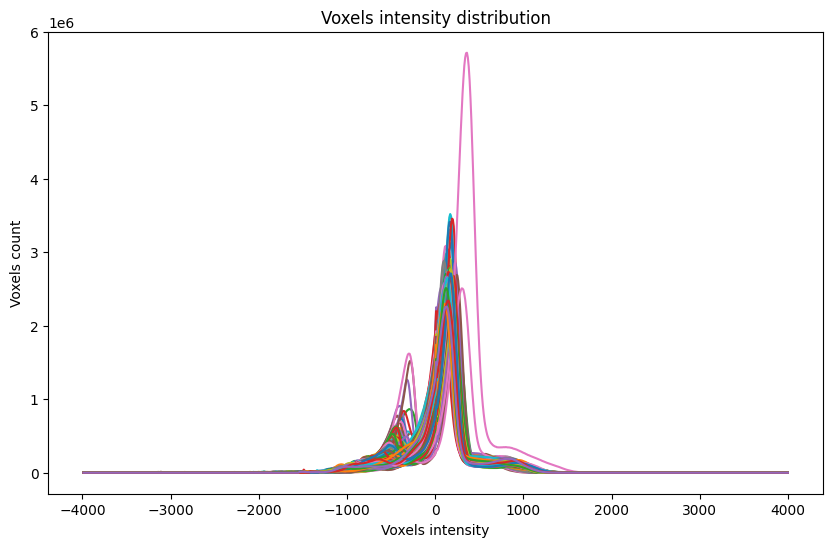

In [19]:
x_coords = bin_edges[1:]
plot_columns_of_dataframe(probably_remove_background_df, x_coords)

In [17]:
import math

def rounded_up_avg_max_indices(df):
    # Calculate the index of the max value in each column
    max_indices = df.apply(lambda x: x.idxmax())

    # Compute the average of these indices
    average_index = max_indices.mean()

    # Use math.ceil to round up the average index
    rounded_up_average = math.ceil(average_index)

    return rounded_up_average


In [18]:
def align_peaks(df, target_index):
    for column in df.columns:
        # Find the index of the maximum value in the column
        current_peak_index = df[column].idxmax()
        
        # Calculate how much to shift to align the peak with the target index
        shift_amount = target_index - current_peak_index
        
        # Shift the column
        df[column] = df[column].shift(shift_amount)
        df = df.fillna(0)
    
    # Return the modified DataFrame
    return df

In [19]:
target = rounded_up_avg_max_indices(probably_remove_background_df)
aligned_peaks_df = align_peaks(probably_remove_background_df, target)

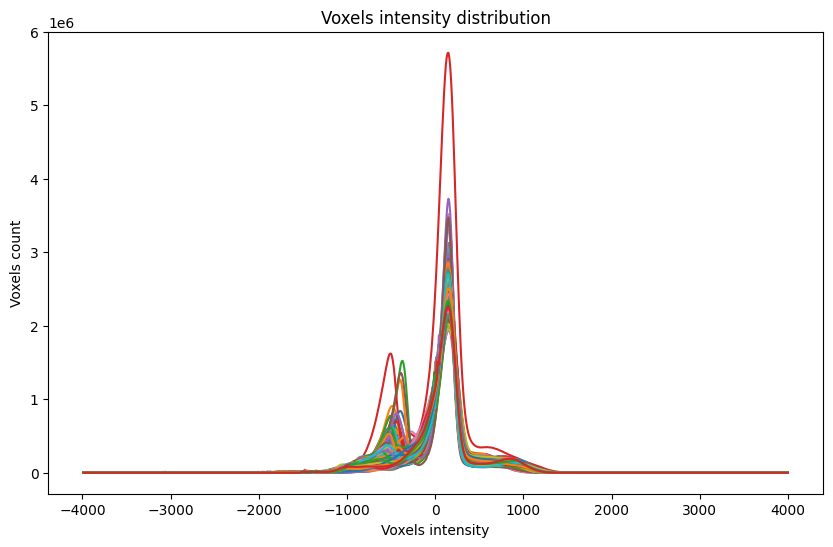

In [20]:
x_coords = bin_edges[1:]
plot_columns_of_dataframe(aligned_peaks_df, x_coords)

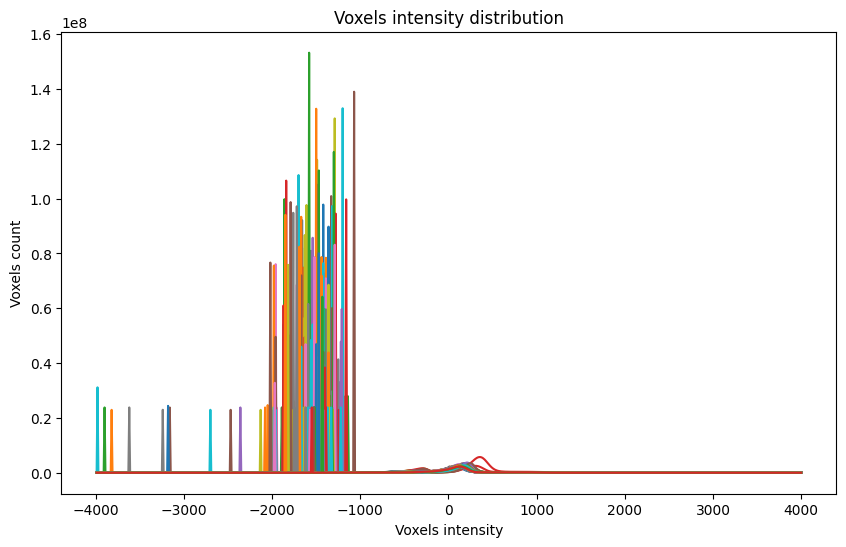

In [35]:
x_coords = bin_edges[1:]
plot_columns_of_dataframe(csv_df, x_coords)